<a href="https://colab.research.google.com/github/Kaizensk/Book-Recommender-System/blob/main/ShwetaKumari_Book_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'blue'><b> Book Recommender System


<font color = 'blue'> During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

<font color = 'blue'> Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [526]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [527]:
#importing libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# <font color = 'blue'><b> About Dataset

<font color = 'blue'> The Book-Crossing dataset comprises 3 files.

<font color = 'blue'>● Users

<font color = 'blue'>Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

<font color = 'blue'>● Books

<font color = 'blue'>Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

<font color = 'blue'>● Ratings


<font color = 'blue'>Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [528]:
# Read the books.csv data
pathBooks = "/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone III/data_book_recommendation/Books.csv"
dfbooks = pd.read_csv(pathBooks)
#df1 = pd.DataFrame(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [529]:
# Read the Ratings.csv data
pathRatings = "/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone III/data_book_recommendation/Ratings.csv"
dfratings = pd.read_csv(pathRatings)
#df1 = pd.DataFrame(df)

In [530]:
# Read the Users.csv data
pathUsers = "/content/drive/MyDrive/AlmaBetter/Capstone_Project/Capstone III/data_book_recommendation/Users.csv"
dfusers = pd.read_csv(pathUsers)
#df1 = pd.DataFrame(df)

In [531]:
dfbooks.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [532]:
dfbooks.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [533]:
dfbooks.shape

(271360, 8)

In [534]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [535]:
dfbooks.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [536]:
dfbooks.loc[dfbooks['Year-Of-Publication'] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [537]:
dfbooks.loc[dfbooks.ISBN == '0789466953','Year-Of-Publication'] = 2000
dfbooks.loc[dfbooks.ISBN == '0789466953','Book-Author'] = "James Buckley"
dfbooks.loc[dfbooks.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
dfbooks.loc[dfbooks.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"

In [538]:
dfbooks.loc[dfbooks.ISBN == '078946697X','Year-Of-Publication'] = 2000
dfbooks.loc[dfbooks.ISBN == '078946697X','Book-Author'] = "JMichael Teitelbaum"
dfbooks.loc[dfbooks.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
dfbooks.loc[dfbooks.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"

In [539]:
dfbooks.loc[dfbooks['Year-Of-Publication'] == 'Gallimard', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [540]:
dfbooks.loc[dfbooks.ISBN == '2070426769','Year-Of-Publication'] = 2003
dfbooks.loc[dfbooks.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
dfbooks.loc[dfbooks.ISBN == '2070426769','Publisher'] = "Gallimard"
dfbooks.loc[dfbooks.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de Les Bergers"

In [541]:
dfbooks['Year-Of-Publication'] = pd.to_numeric(dfbooks['Year-Of-Publication'], errors = 'coerce')

In [542]:
print(sorted(dfbooks['Year-Of-Publication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [543]:
#sns.distplot(dfbooks['Year-Of-Publication'], kde=False, hist_kws={"range": [1945,2020]})

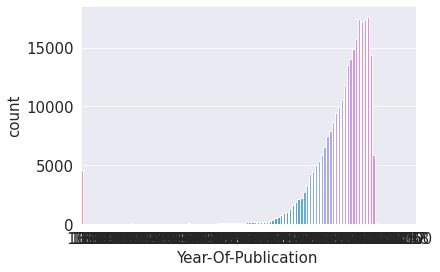

In [544]:
sns.countplot(x="Year-Of-Publication", data=dfbooks)

In [545]:
dfbooks.loc[(dfbooks['Year-Of-Publication'] > 2006) | (dfbooks['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN
dfbooks['Year-Of-Publication'].fillna(round(dfbooks['Year-Of-Publication'].median()), inplace = True)

In [546]:
dfbooks['Year-Of-Publication'] = dfbooks['Year-Of-Publication'].astype(np.int32)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


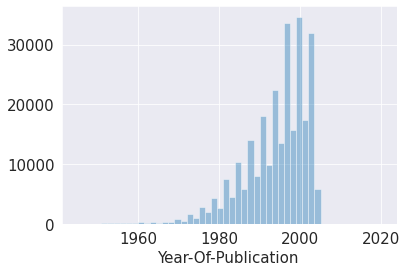

In [547]:
# Publication by Year
#year = pd.to_numeric(dfbooks['Year-Of-Publication'], 'coerse').fillna(2099, downcast = 'infer')
sns.distplot(dfbooks['Year-Of-Publication'], kde=False, hist_kws={"range": [1945,2020]})

In [548]:
dfbooks.loc[dfbooks.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [549]:
dfbooks.loc[(dfbooks.ISBN == '193169656X'), 'Publisher'] = 'other'
dfbooks.loc[(dfbooks.ISBN == '1931696993'), 'Publisher'] = 'other'

In [550]:
dfbooks.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [551]:
dfbooks.loc[dfbooks.ISBN == '9627982032','Book-Author'] = "David Tait"

In [552]:
dfbooks.loc[dfbooks.ISBN == '193169656X','Publisher'] = "Novelbooks Inc"
dfbooks.loc[dfbooks.ISBN == '1931696993','Publisher'] = "Bantam"

In [553]:
dfbooks.shape

(271360, 5)

In [554]:
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [555]:
dfratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [556]:
dfratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [557]:
dfratings.shape

(1149780, 3)

In [558]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [559]:
dfratings.duplicated().sum()

0

<font color = 'blue'> We do not have any null values for the ratings data

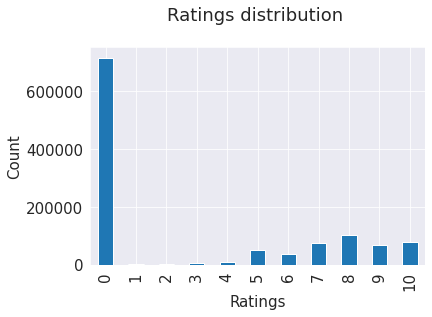

In [560]:
plt.rc("font", size=15)
dfratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Ratings distribution \n')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [561]:
unique_ratings = dfratings[dfratings.ISBN.isin(dfbooks.ISBN)]

In [562]:
ratings_explicit= unique_ratings[unique_ratings['Book-Rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['Book-Rating'] == 0]

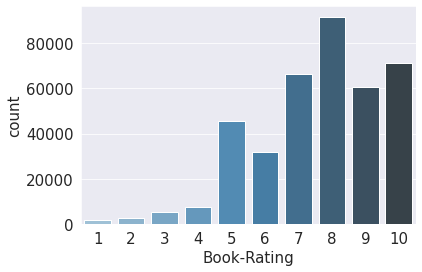

In [563]:
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='Book-Rating', palette="Blues_d")
plt.show()

In [564]:
dfratings.shape

(1149780, 3)

In [565]:
unique_ratings.shape

(1031136, 3)

In [566]:
ratings_implicit.shape

(647294, 3)

In [567]:
ratings_explicit.shape

(383842, 3)

In [568]:
dfratings_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
dfratings_count.sort_values('Book-Rating', ascending = False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [569]:
avg_rating= pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].mean())
avg_rating['ratingCount'] = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
avg_rating.sort_values('ratingCount', ascending= False).head()

,Book-Rating,ratingCount
ISBN,,
0316666343,8.185290,707
0971880107,4.390706,581
0385504209,8.435318,487
0312195516,8.182768,383
0060928336,7.887500,320


In [570]:
user_rating_count= pd.DataFrame(ratings_explicit['User-ID'].value_counts())

In [571]:
user_rating_count

,User-ID
11676,6943
98391,5691
189835,1899
153662,1845
23902,1180
...,...
148684,1
124088,1
105655,1
103606,1


# <font color = 'blue'> Users data

In [572]:
dfusers.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [573]:
dfusers.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [574]:
dfusers.shape

(278858, 3)

In [575]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [576]:
dfusers.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [577]:
dfusers.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

<font color = 'blue'> We have 110762 null values in Age column for Users data

In [578]:
print(sorted(dfusers.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

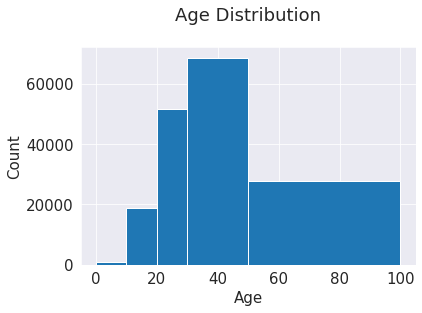

In [579]:
dfusers.Age.hist(bins=[0,10,20,30,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [580]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


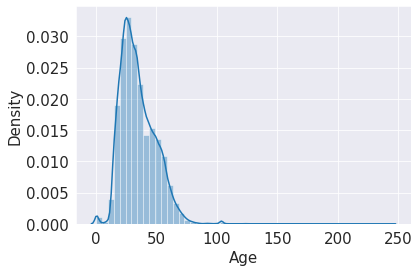

In [581]:
sns.distplot(dfusers['Age'].dropna())

In [582]:
dfusers[['City','State','Country']] = dfusers.Location.str.split(",",expand=True,n=2)

In [583]:
dfusers.drop(['Location','City','State'],axis=1,inplace=True)

In [584]:
dfusers['Country'].unique()

array([' usa', ' russia', ' portugal', ..., ' la svizzera', ' hernando',
       ' united kingdom.'], dtype=object)

In [585]:
dfusers.nunique()

User-ID    278858
Age           165
Country      1276
dtype: int64

In [586]:
dfusers.isnull().sum()

User-ID         0
Age        110762
Country         2
dtype: int64

In [587]:
dfusers['Country']=dfusers['Country'].astype('str')

In [588]:
dfusers.loc[(dfusers.Age > 90) | (dfusers.Age < 5), 'Age'] = np.nan

In [589]:
dfusers = dfusers[dfusers['Country'].notna()]

In [590]:
dfusers['Age'] = dfusers['Age'].fillna(dfusers.groupby('Country')['Age'].transform('median'))

In [591]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      278319 non-null  float64
 2   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ MB


In [592]:
dfusers.isna().sum()

User-ID      0
Age        539
Country      0
dtype: int64

In [593]:
dfusers['Age'].fillna(dfusers.Age.mean(),inplace=True)

In [594]:
dfusers.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [595]:
len(dfbooks["Book-Title"].unique())

242135

In [596]:
len(dfbooks["Book-Author"].unique())

102023

In [597]:
len(dfbooks["Publisher"].unique())

16805

In [598]:
len(dfratings["User-ID"].unique())

105283

In [599]:
len(dfratings["ISBN"].unique())

340556

In [600]:
len(dfratings["Book-Rating"].unique())

11

In [601]:
dfratings['User-ID'].nunique()

105283

In [602]:
dfusers['User-ID'].nunique()

278858

In [603]:
dfbooks['ISBN'].nunique()

271360

In [604]:
#ratingsPivot= dfratings.pivot(index = 'User-ID', columns= 'ISBN').Book-Rating
#UserId= ratingsPivot.index
#ISBN = ratingsPivot.columns
#print(ratingsPivot.shape)
#ratingsPivot.head()